## Demographic changes and LD patterns
##### Exponential growth
Here, I will carry out simulationg from a population which at time t=0 has Ne of 20,000, but has grown exponentially. I will vary the rates of growth from 0 to 1e-3. To do this, instead of starting with a `Simulation` object, I start with an `ExpGrowth` one and pass it to `topology_growth_rate()` along with my list of growth rates. This will return a `Simulation_results` class object much like the above. 

In [1]:
from msp_sim import *
from tree_LD_analysis import *
import numpy as np 
import msprime as msprime 
import pandas as pd
import tskit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= st

/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= st

/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= st

/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= st

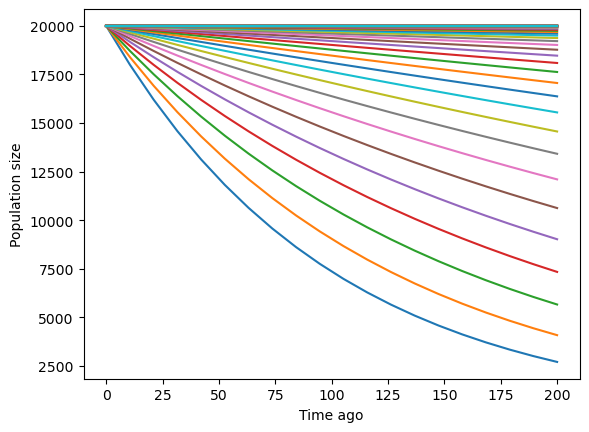

In [2]:
expgrowth_sim=ExpGrowth(r=0,Ne=20_000) # initialise a simulation with constant size
expgrowth_sim.mutation_rate = 1e-5
num_reps=100
exponents=np.arange(2,10,0.1)
growth_rates=[1/(10**i) for i in exponents] # make a list of growth rates from 1e-3 to 1e-15
expgrowth_results=topology_growth_rate(expgrowth_sim, # simulate and mutate!
                          num_replicates=num_reps, # 1,000 replicates in each scenario
                          growth_rates=growth_rates,
                          plot_dems=True,signed=True) 

In [3]:
for i in range(len(growth_rates)):
    print(np.sum(np.isnan(expgrowth_results.r2[:,i,0])))

0
0
0
0
1
0
0
0
0
0
0
1
2
1
3
7
0
2
4
5
3
2
5
7
5
7
2
10
8
8
7
10
4
15
12
9
13
9
12
15
12
13
15
9
15
10
10
12
14
9
9
8
11
15
10
10
12
6
14
6
10
7
6
9
12
21
14
16
16
12
11
11
15
15
7
13
13
17
17
10


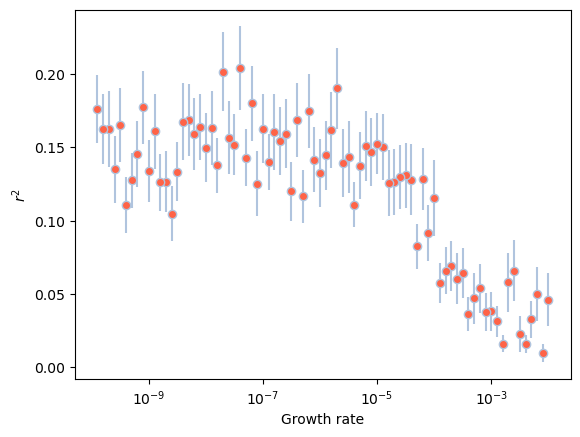

In [6]:
for i in range(len(growth_rates)):
    plt.errorbar(growth_rates[i],
                 np.nanmean(expgrowth_results.r2[:,i,0]**2),
                 # for clarity I'm plotting error bars which are 0.1 st dev. 
                 np.sqrt(np.nanvar(expgrowth_results.r2[:,i,0]**2)*0.01),marker='o', 
                 mfc='tomato',
                 mec="lightsteelblue",
                 c="lightsteelblue")
plt.ylabel("$r^2$")
plt.xscale("log")
plt.xlabel("Growth rate");
plt.savefig('expgrowth1.pdf')

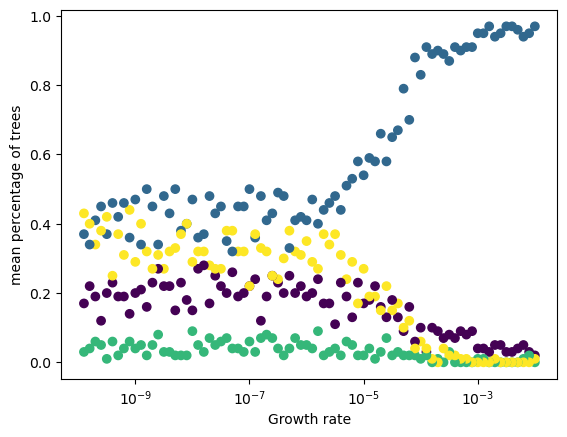

In [7]:
for i in range(len(growth_rates)):
    plt.scatter([growth_rates[i]]*4,
                 np.nanmean(expgrowth_results.tops[:,i,:],axis=0),
                 marker='o',c=[1,2,3,4])
plt.ylabel("mean percentage of trees")
plt.xscale("log")
plt.xlabel("Growth rate");
plt.savefig('expgrowth2.pdf')

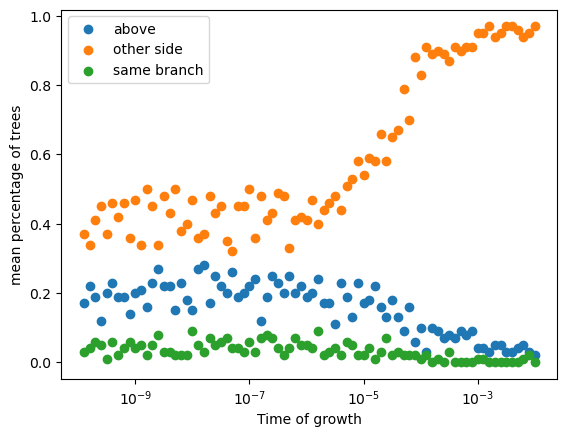

In [8]:
classes=["above","other side","same branch","opposite branch"]
for i in range(3):
    plt.scatter([growth_rates],
                 np.nanmean(expgrowth_results.tops[:,:,i],axis=0),
                 marker='o',label=classes[i])
plt.ylabel("mean percentage of trees")
plt.xlabel("Time of growth")
plt.xscale("log")
plt.legend();
plt.savefig('expgrowth2.pdf')

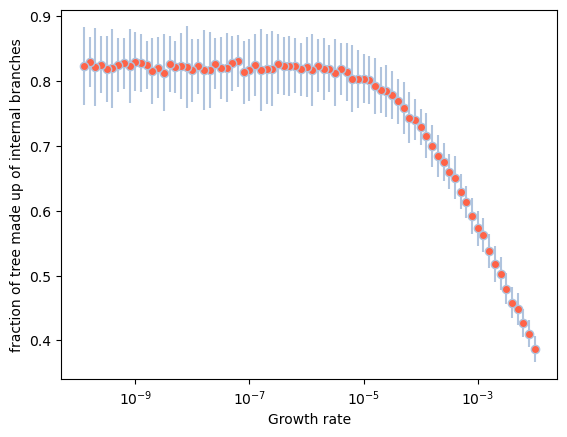

In [9]:
for i in range(len(growth_rates)):
    plt.errorbar(growth_rates[i],
                 np.nanmean(expgrowth_results.fracs[:,i]),
                 np.sqrt(np.nanvar(expgrowth_results.fracs[:,i])),marker='o',
                 mfc='tomato',
                 mec="lightsteelblue",
                 c="lightsteelblue")
plt.ylabel("fraction of tree made up of internal branches")
plt.xlabel("Growth rate")
plt.xscale("log");
plt.savefig('expgrowth3.pdf')

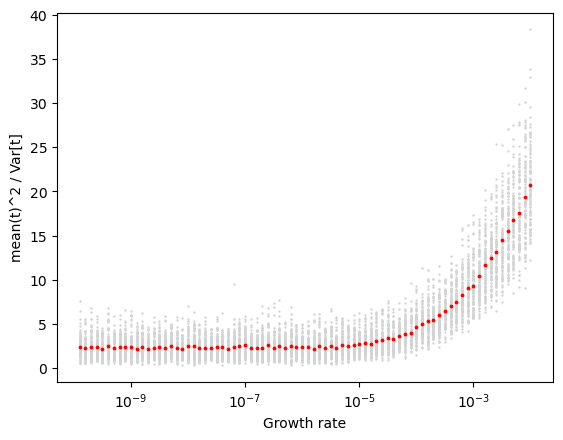

In [12]:
stats=expgrowth_results.stats
ks=stats.keys()
for k in ks:
    cor=stats[k]["cor"]
    probs=stats[k]["c"]
    times=stats[k]["t"]
    gr=growth_rates[k]
    plt.scatter([gr]*times.shape[0],times[:,2],s=0.5,c="lightgrey") # t^2/var(t)
    plt.scatter(gr,np.mean(times[:,2]),s=3,c="red") # t^2/var(t)
plt.xscale("log")
plt.xlabel("Growth rate")
plt.ylabel("mean(t)^2 / Var[t]");